# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
# city_type = pyber_data_df.set_index(["city"])["type"]
rides_city_type = pyber_data_df.groupby("type").count()["ride_id"]

rides_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type 
drivers_city_type = city_data_df.groupby("type").sum()["driver_count"]

drivers_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
fares_city_type = pyber_data_df.groupby("type")["fare"].sum()

fares_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
type_avg_fare_ride = pyber_data_df.groupby(["type"]).mean()["fare"]


In [7]:
# 5. Get the average fare per driver for each city type. 
type_avg_fare_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / drivers_city_type

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
#     "City Type": city_type,
    "Total Rides": rides_city_type,
    "Total Drivers": drivers_city_type,
    "Total Fares": fares_city_type,
    "Average Fare": type_avg_fare_ride,
    "Average Fare (per Driver)": type_avg_fare_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare,Average Fare (per Driver)
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:.2f}".format)
pyber_summary_df["Average Fare"] = pyber_summary_df["Average Fare"].map("${:.2f}".format)
pyber_summary_df["Average Fare (per Driver)"] = pyber_summary_df["Average Fare (per Driver)"].map("${:.2f}".format)

In [11]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare,Average Fare (per Driver)
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,"2,405",$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

# fare_type = pyber_data_df.groupby("type")["fare"].sum()
# date_type = pyber_data_df.groupby("type")["date"].sum()


# pyber_plot_df = pd.DataFrame({
#     "Date": date_type,
#     "Total Fares": fare_type})

# pyber_plot_df

pyber_data_df['date']= pd.to_datetime(pyber_data_df['date'])
total_fares = pyber_data_df.groupby(["type","date"])["fare"].sum()



pyber_plot_df = pd.DataFrame({
    "Fare": total_fares,
    })

pyber_plot_df

Fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# pyber_plot_df = pyber_plot_df.reset_index()

# pyber_plot_df

pyber_plot_df = pyber_plot_df.reset_index()

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
# pyber_pivot = pyber_plot_df.pivot(index="Date", columns="type", values="Total Fares")
# pyber_pivot.head(10)

pyber_pivot = pyber_plot_df.pivot(index="date", columns="type", values="Fare")
pyber_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
ridecounts_Jan_Apr = pyber_pivot.loc['2019-01-01':'2019-04-29']
ridecounts_Jan_Apr


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [17]:
pyber_pivot.dtypes

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_pivot.index = pd.to_datetime(pyber_pivot.index)

# pyber_pivot.index = pd.to_datetime(pyber_pivot.index)

pyber_pivot.info()
#ridecounts_Jan_Apr['Date']= pd.to_datetime(pyber_pivot.loc['2019-01-01':'2019-04-29'])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 138.8 KB


In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 138.8 KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_rides_df = pyber_pivot.resample('W').count()
weekly_rides_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,5,22,66
2019-01-13,3,35,80
2019-01-20,8,41,84
2019-01-27,6,34,84
2019-02-03,9,32,88
2019-02-10,4,31,94
2019-02-17,3,34,86
2019-02-24,11,43,103
2019-03-03,5,30,88


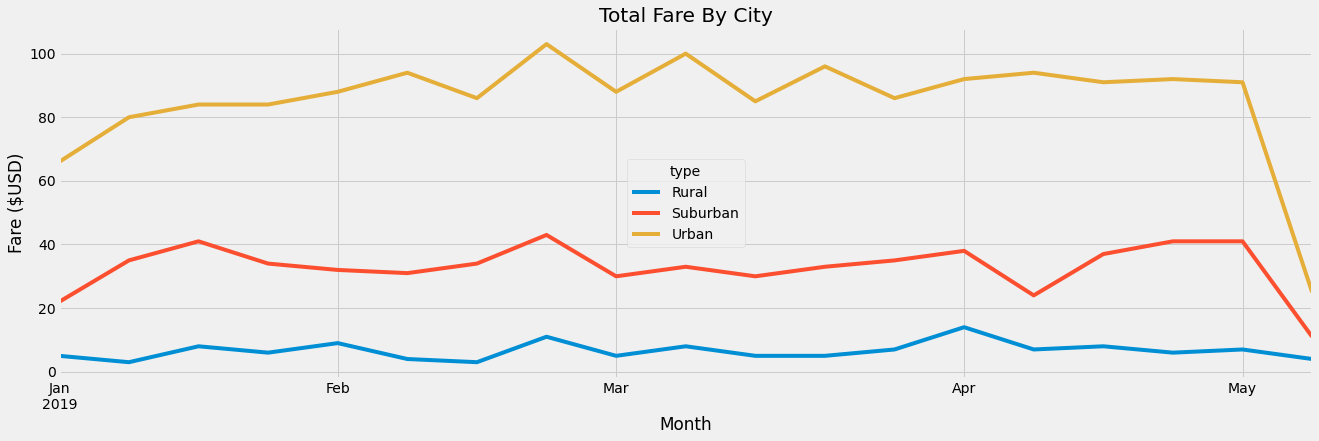

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#Plot fig
fig = weekly_rides_df.plot(figsize=(20,6))

#Title
fig.set_title("Total Fare By City")

#Axes
fig.set_ylabel("Fare ($USD)")
fig.set_xlabel("Month")

plt.savefig("challenge_fig")

# fig, ax.subplot()
# weekly_rides_df.plot(x=x_axis, y="fare", label="city")

# ax.legend()
# ax.grid()

